In [1]:
from google.colab import drive
drive.mount('/content/gdrive')





Mounted at /content/gdrive


Mounted at /content/gdrive


In [7]:
!unzip gdrive/MyDrive/emotionpics.zip

Streaming output truncated to the last 5000 lines.
 extracting: validation/happy/12024.jpg  
 extracting: validation/happy/12098.jpg  
 extracting: validation/happy/12120.jpg  
 extracting: validation/happy/12129.jpg  
 extracting: validation/happy/12141.jpg  
 extracting: validation/happy/12191.jpg  
 extracting: validation/happy/12239.jpg  
 extracting: validation/happy/12257.jpg  
 extracting: validation/happy/12284.jpg  
 extracting: validation/happy/12321.jpg  
 extracting: validation/happy/12329.jpg  
 extracting: validation/happy/12349.jpg  
 extracting: validation/happy/12359.jpg  
 extracting: validation/happy/12376.jpg  
 extracting: validation/happy/12379.jpg  
 extracting: validation/happy/12381.jpg  
 extracting: validation/happy/12410.jpg  
 extracting: validation/happy/1246.jpg  
 extracting: validation/happy/12487.jpg  
 extracting: validation/happy/12492.jpg  
 extracting: validation/happy/12497.jpg  
 extracting: validation/happy/12557.jpg  
 extracting: validation/ha

In [33]:
!rm -rf /content/images/validation/Yawning 

In [9]:
train_data_dir = '/content/train'
validation_data_dir = '/content/validation'

Found 33032 images belonging to 10 classes.
Found 7213 images belonging to 10 classes.
{'angry': 0, 'attentive': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'sleepy': 7, 'surprise': 8, 'yawing': 9}


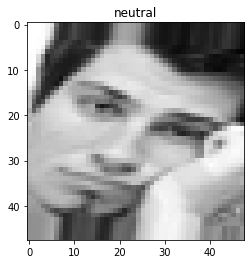

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

#train_data_dir='C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/code/Face Recog/images/train/'
#validation_data_dir='C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/code/Face Recog/images/validation/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['angry','attentive' ,'disgust', 'fear', 'happy','neutral','sad','sleepy', 'surprise','yawning']

img, label = train_generator.__next__()

print(train_generator.class_indices)
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()
##########################################################

In [12]:

###########################################################
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


#train_path = 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/code/Face Recog/images/train/'
#test_path = "C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/code/Face Recog/images/train/validation/"

num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(validation_data_dir):
    num_test_imgs += len(files)


epochs=100

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_100epochs.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [13]:
print(history.history['val_loss'])

[1.6920315027236938, 1.461848497390747, 1.3614461421966553, 1.2889219522476196, 1.237701416015625, 1.2123847007751465, 1.218732476234436, 1.2024272680282593, 1.1670281887054443, 1.187282681465149, 1.1661678552627563, 1.169801115989685, 1.1552231311798096, 1.188341736793518, 1.1570881605148315, 1.160555124282837, 1.180506944656372, 1.1478395462036133, 1.138412594795227, 1.1500070095062256, 1.1473479270935059, 1.1556683778762817, 1.1546342372894287, 1.126732349395752, 1.116885781288147, 1.1530288457870483, 1.1373119354248047, 1.1296355724334717, 1.1048685312271118, 1.1232579946517944, 1.1384278535842896, 1.1276109218597412, 1.1259698867797852, 1.1343543529510498, 1.1235041618347168, 1.1153713464736938, 1.1523720026016235, 1.1228504180908203, 1.1555243730545044, 1.1278865337371826, 1.1266911029815674, 1.1397526264190674, 1.122815728187561, 1.1035642623901367, 1.1309349536895752, 1.1155487298965454, 1.1039021015167236, 1.11801278591156, 1.1250696182250977, 1.1238296031951904, 1.14428496360

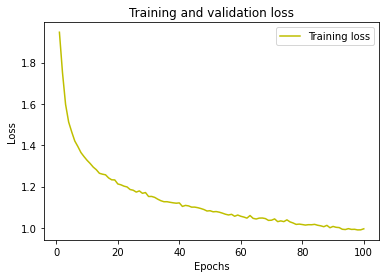

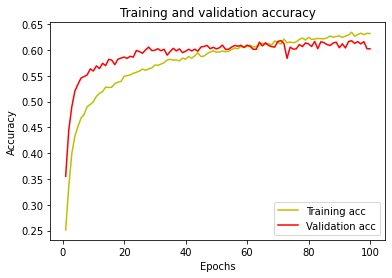

In [14]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy =  0.6875


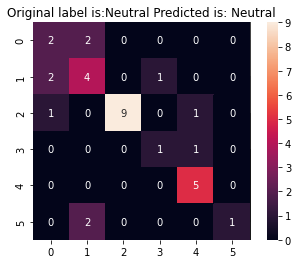

In [15]:
from tensorflow.keras.models import load_model


#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise','Yawning']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

<module 'ntpath' from 'C:\\Users\\Supra\\Anaconda3\\lib\\ntpath.py'>
